## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 데이터 확인

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


### <데이터 딕셔너리>
- Survived : 생존=1, 죽음=0
- Pclass : 승객 등급. 숫자가 작을수록 높은 등급
- SibSp : 함께 탑승한 형제 또는 배우자 수
- Parch : 함께 탑승한 부모 또는 자녀 수
- Ticket : 티켓번호
- Cabin : 선실번호
- Embarked : 탑승장소. S=Southampton, C=Cherbourg, Q=Queenstown


## 각 feature와 생존의 연관성

- feature : Pclass, Sex, SibSp, Parch, Embarked, Age  

파라미터로 feature를 넣어 생존여부를 ploting.

In [8]:
def bar_chart(feature):
    #데이터에 대한 설명, 정의
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    
    #plot의 정보, 형태 설정
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

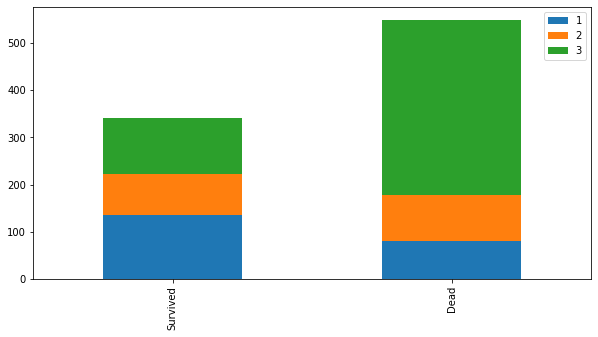

In [9]:
bar_chart('Pclass')

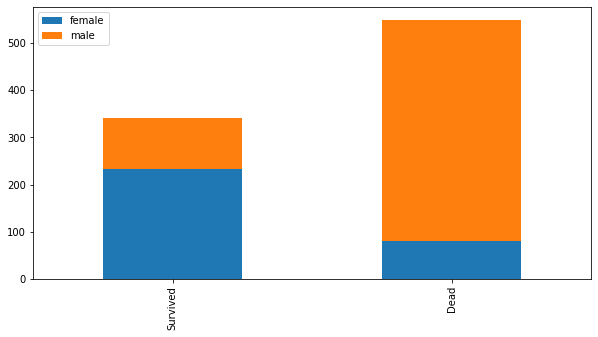

In [10]:
bar_chart('Sex')

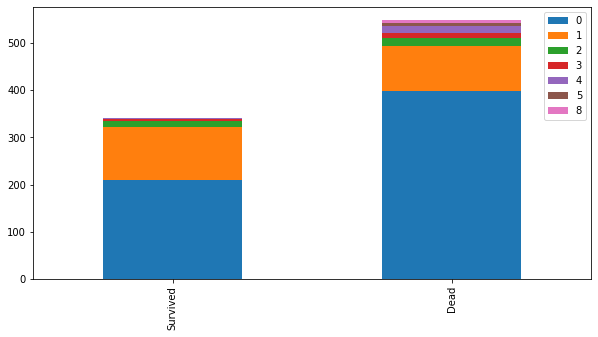

In [11]:
bar_chart('SibSp')

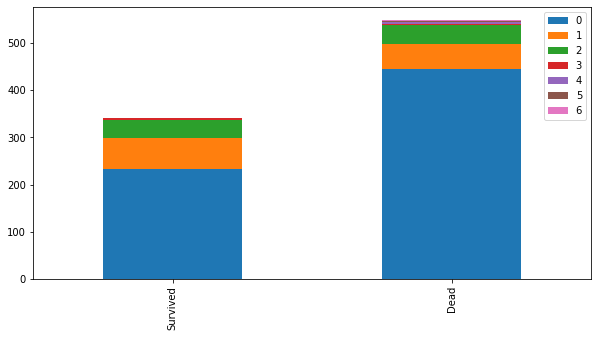

In [12]:
bar_chart('Parch')

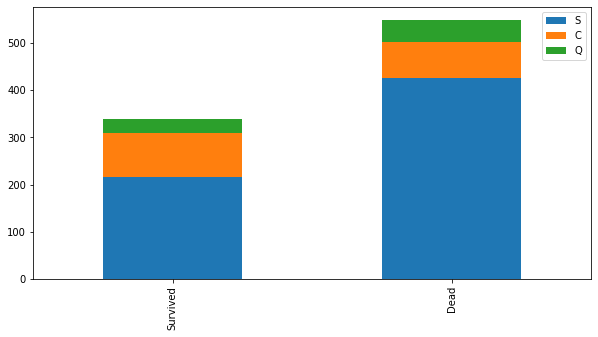

In [13]:
bar_chart('Embarked')

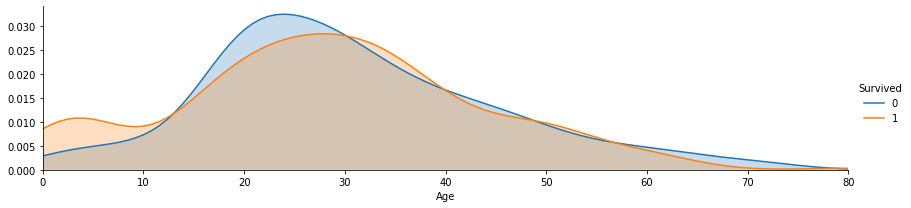

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

더 쉽게 알아보기 위해 나이대별로 쪼개서 막대그래프로 나타내보자.

In [15]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

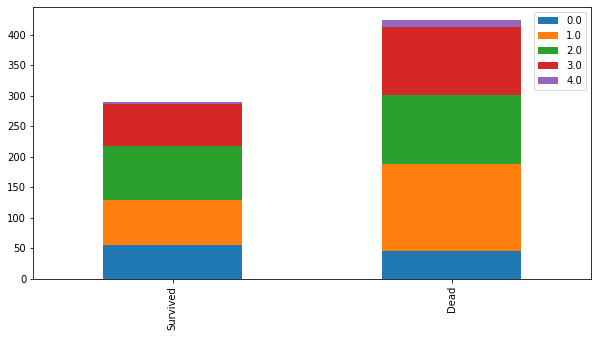

In [16]:
bar_chart('Age')

## 데이터 정리

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#null value가 가장 높은 cabin을 drop한다.
train.drop('Cabin', axis=1, inplace=True)

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
test.drop('Cabin', axis=1, inplace=True)

**string인자로 나타나있는 성별정보(female, male)를 예측을 위해 0, 1로 바꾼다.  
(female=0, male=1)**

In [21]:
train.Sex[train.Sex=='male']=0
train.Sex[train.Sex=='female']=1
test.Sex[test.Sex=='male']=0
test.Sex[test.Sex=='female']=1

C:\Users\fls30\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\fls30\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\fls30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

**탑승장소정보(S, C, Q) 또한 0, 1, 2로 변환한다.  
(S=0, C=1, Q=2)**

In [22]:
train.Embarked[train.Embarked=='S']=0
train.Embarked[train.Embarked=='C']=1
train.Embarked[train.Embarked=='Q']=2

test.Embarked[test.Embarked=='S']=0
test.Embarked[test.Embarked=='C']=1
test.Embarked[test.Embarked=='Q']=2

C:\Users\fls30\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\fls30\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\fls30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

**PassengerId와 Ticket column은 필요하지 않은 정보임으로 drop한다.**

In [23]:
PassengerId=test['PassengerId']

In [24]:
train.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

**나머지 부분의 NaN values는 평균값으로 채운다.** 

In [25]:
test['Fare']=test['Fare'].fillna(np.mean(test['Fare']))
test['Age']=test['Age'].fillna(np.mean(test['Age']))
train['Age']=train['Age'].fillna(np.mean(train['Age']))
train['Embarked']=train['Embarked'].fillna(0)

In [26]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,0


**데이터간략화**

In [29]:
#train데이터

#Name정보 정리(반점과 온점 제거, Title별 정리)
title = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(title)
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train.drop('Name',axis=1,inplace=True)

#동승객(가족) 사이즈 별 정리
train['Familysize']=train['SibSp']+train['Parch']+1
train['Single'] = train['Familysize'].map(lambda s: 1 if s == 1 else 0)
train['SmallF'] = train['Familysize'].map(lambda s: 1 if  s == 2  else 0)
train['MedF'] = train['Familysize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeF'] = train['Familysize'].map(lambda s: 1 if s >= 5 else 0)

In [30]:
#test데이터

#Name정보 정리(반점과 온점 제거, Title별 정리)title = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(title)
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test.drop('Name',axis=1,inplace=True)

#동승객(가족) 사이즈 별 정리
test['Familysize']=test['SibSp']+test['Parch']+1
test['Single'] = test['Familysize'].map(lambda s: 1 if s == 1 else 0)
test['SmallF'] = test['Familysize'].map(lambda s: 1 if  s == 2  else 0)
test['MedF'] = test['Familysize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test['LargeF'] = test['Familysize'].map(lambda s: 1 if s >= 5 else 0)

**정리된 데이터 확인**

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,Single,SmallF,MedF,LargeF
0,0,3,0,1.0,1,0,7.2500,0,2,2,0,1,0,0
1,1,1,1,3.0,1,0,71.2833,1,1,2,0,1,0,0
2,1,3,1,1.0,0,0,7.9250,0,1,1,1,0,0,0
3,1,1,1,2.0,1,0,53.1000,0,1,2,0,1,0,0
4,0,3,0,2.0,0,0,8.0500,0,2,1,1,0,0,0


In [32]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,Single,SmallF,MedF,LargeF
0,3,0,2.0,0,0,7.8292,2,2,1,1,0,0,0
1,3,1,3.0,1,0,7.0000,0,1,2,0,1,0,0
2,2,0,3.0,0,0,9.6875,2,1,1,1,0,0,0
3,3,0,2.0,0,0,8.6625,0,1,1,1,0,0,0
4,3,1,1.0,1,1,12.2875,0,2,3,0,0,1,0


In [33]:
from sklearn.model_selection import train_test_split

X=train.drop('Survived',axis=1)
y=train['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_trainscaled=scaler.fit_transform(X_train)
X_testscaled=scaler.fit_transform(X_test)
testscaled=scaler.fit_transform(test)

## 학습모델로 accuracy 구하기

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(X_trainscaled,y_train)
y_pred=model.predict(X_testscaled)
n=accuracy_score(y_test,y_pred)
print('Accuracy of Logistic regression model: {}%'.format(round(n*100,2)))

Accuracy of Logistic regression model: 82.09%


### Support vector machine(SVM)

In [36]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC()
svc.fit(X_train, y_train)
y1_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print('Accuracy of SVM model: {}%'.format(acc_svc))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y1_pred)))

Accuracy of SVM model: 67.9%
Root Mean Squared Error: 0.5859040724295678


### Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y2_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print('Accuracy of Decision tree model: {}%'. format(acc_decision_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y2_pred)))

Accuracy of Decision tree model: 95.99%
Root Mean Squared Error: 0.47316022340738384


### Random forest classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y3_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print('Accuracy of Random forest classifier: {}%'.format(acc_random_forest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y3_pred)))

Accuracy of Random forest classifier: 95.99%
Root Mean Squared Error: 0.44048819592160315


### Stochastic Gradient Descent(SGD)

In [39]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print('Accuracy of Random forest classifier: {}%'.format(acc_sgd))

Accuracy of Random forest classifier: 72.39%


### Linear SVC

In [40]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print('Accuracy of Random forest classifier: {}%'.format(acc_linear_svc))

Accuracy of Random forest classifier: 82.5%


C:\Users\fls30\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Perceptron

In [41]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print('Accuracy of Random forest classifier: {}%'.format(acc_perceptron))

Accuracy of Random forest classifier: 79.78%


### knn

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print('Accuracy of Random forest classifier: {}%'.format(acc_knn))

Accuracy of Random forest classifier: 86.68%


## 결과평가

In [43]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'Decision Tree', 'Random Forest', 
              'Logistic Regression', 'Stochastic Gradient Decent',
              'Linear SVC','Perceptron'
              ],
    'Acc_Score': [round(n*100,2), acc_svc, acc_decision_tree, 
              acc_random_forest, acc_sgd, acc_linear_svc, 
              acc_perceptron, acc_knn]})
models.sort_values(by='Acc_Score', ascending=False)

,Model,Acc_Score
2,Decision Tree,95.99
3,Random Forest,95.99
7,Perceptron,86.68
5,Stochastic Gradient Decent,82.50
0,Logistic Regression,82.09
6,Linear SVC,79.78
4,Logistic Regression,72.39
1,Support Vector Machines,67.90


### **결론 : "Decision Tree와 Random Forest 학습모델을 통해 높은 accuracy 점수를 얻을 수 있다."**

# kaggle 제출
kaggle에 제출할 수 있도록 승객번호와 생존예측결과로 구성된 TitanicSubmission.csv파일을 만든다. 이 csv파일을 kaggle에 업로드하여 예측모델에 대한 점수를 부여받는다.

In [50]:
prediction=model.predict(testscaled)
answerdf=pd.DataFrame({'PassengerId':PassengerId,'Survived':prediction})
answerdf.to_csv('TitanicSubmission_logistic.csv',index=False)

In [51]:
prediction=svc.predict(testscaled)
answerdf=pd.DataFrame({'PassengerId':PassengerId,'Survived':prediction})
answerdf.to_csv('TitanicSubmission_svc.csv',index=False)

In [52]:
prediction=decision_tree.predict(testscaled)
answerdf=pd.DataFrame({'PassengerId':PassengerId,'Survived':prediction})
answerdf.to_csv('TitanicSubmission_decision_tree.csv',index=False)

In [53]:
prediction=random_forest.predict(testscaled)
answerdf=pd.DataFrame({'PassengerId':PassengerId,'Survived':prediction})
answerdf.to_csv('TitanicSubmission_random_forest.csv',index=False)

In [54]:
prediction=sgd.predict(testscaled)
answerdf=pd.DataFrame({'PassengerId':PassengerId,'Survived':prediction})
answerdf.to_csv('TitanicSubmission_sgd.csv',index=False)

In [55]:
prediction=linear_svc.predict(testscaled)
answerdf=pd.DataFrame({'PassengerId':PassengerId,'Survived':prediction})
answerdf.to_csv('TitanicSubmission_linear_svc.csv',index=False)

In [56]:
prediction=perceptron.predict(testscaled)
answerdf=pd.DataFrame({'PassengerId':PassengerId,'Survived':prediction})
answerdf.to_csv('TitanicSubmission_perceptron.csv',index=False)

In [57]:
prediction=knn.predict(testscaled)
answerdf=pd.DataFrame({'PassengerId':PassengerId,'Survived':prediction})
answerdf.to_csv('TitanicSubmission_knn.csv',index=False)